## Support Vector Machines

Credits: http://cvxopt.org; https://xavierbourretsicotte.github.io

Let's work on both the hard margin and soft margin SVM algorithm in Python using the well known **CVXOPT** library. While the algorithm in its mathematical form is rather straightfoward, its implementation in matrix form using the CVXOPT API can be challenging at first. This notebook will show the steps required to derive the appropriate vectorized notation as well as the inputs needed for the API.

#### Notations

Scalars are denoted with italic lowercases (e.g., $y$, $b$), vectors with bold lowercases (e.g., $\mathbf{w},\, \mathbf{x}$), and matrices with italic uppercases (e.g., $W$). $\mathbf{w^T}$ is the transpose of $\mathbf{w}$
and $\|\mathbf{w}\| = \mathbf{w}^T\mathbf{w}$

Let:

- $\mathbf{x}$ be a feature vector (i.e., the input of the SVM). $\mathbf{x} \in \mathbb{R}^n$, where $𝑛$ is the dimension of the feature vector. 
- $y$ be the class (i.e., the output of the SVM). $y \in \{ -1,1\}$, i.e. the classification task is binary.
- $\mathbf{w}$ and $b$ be the parameters of the SVM: we need to learn them using the training set.
- $(\mathbf{x}^{(i)}, y^{(i)})$ be the $𝑖$th sample in the dataset. Let's assume we have $m$ samples in the training set.

With n = 2, one can represent the SVM's decision boundaries as follows:

<img src = "figures/svm.png" width="300" >

The class $y$ is determined as follows:

$$
y^{(i)}=\left\{
                \begin{array}{ll}
                  -1 &\text{ if } \mathbf{w^T}\mathbf{x}^{(i)}+b \leq -1 \\
                  1 &\text{ if } \mathbf{w^T}\mathbf{x}^{(i)}+b \ge 1 \\
                \end{array}
              \right.
$$

which can be more concisely written as 

$$y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1$$

#### Goal

The SVM aims at satisfying two requirements:

1. The SVM should maximize the distance between the two decision boundaries. Mathematically, this means we want to maximize the distance between the hyperplane defined by $\mathbf{w^T}\mathbf{x}+b = -1$ and the hyperplane defined by $\mathbf{w^T}\mathbf{x}+b = 1$.  This distance is equal to $\frac{2}{\|\mathbf{w}\|}$.  This means we want to solve $\underset{\mathbf{w}}{\operatorname{max}} \frac{2}{\|\mathbf{w}\|}$.  Equivalently we want $\underset{\mathbf{w}}{\operatorname{min}} \frac{\|\mathbf{w}\|}{2}$

2. The SVM should also correctly classify all $\mathbf{x}^{(i)}$, which means 

$$y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1, \forall i \in \{1,\dots,m\}$$

#### Hard margin vs. Soft margin 

This is the **hard-margin SVM**, as this quadratic optimization problem admits a solution iff the data is linearly separable.

One can relax the constraints by introducing so-called **slack variables** $\xi^{(i)}$. Note that each sample of the training set has its own slack variable. This gives us the **soft-margin SVM** following quadratic optimization problem:

$$
\begin{align}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}+ C \sum_{i=1}^{N} \xi^{(i)}, \\
s.t.\quad&y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1 - \xi^{(i)},&\forall i \in \{1,\dots,N\} \\
\quad&\xi^{(i)}\ge0, &\forall i \in \{1,\dots,N\} 
\end{align}
$$

#### Kernels

One can add even more flexibility by introducing a function $\phi$ that maps the original feature space to a higher dimensional feature space. This allows non-linear decision boundaries. The quadratic optimization problem becomes:

$$
\begin{align}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}+ C \sum_{i=1}^{N} \xi^{(i)}, \\
s.t.\quad&y^{(i)} (\mathbf{w^T}\phi \left(\mathbf{x}^{(i)}\right)+b) \ge 1 - \xi^{(i)},&\forall i \in \{1,\dots,N\} \\
\quad&\xi^{(i)}\ge0, &\forall i \in \{1,\dots,N\} 
\end{align}
$$


#### Primal Problem

Recall that our primal, optimization problem is of the form:

$$
\begin{aligned}
	\min_{w, b} f(w,b) & = \min_{w, b}  \  \frac{1}{2} ||w||^2
	\\
	s.t. \ \  g_i(w,b) &= - y^{(i)} (w^T x^{(i)} + b) + 1 = 0 
\end{aligned}
$$

#### Lagrange Method

The method of Lagrange multipliers allows us to turn a constrained optimization problem into an unconstrained one of the form:

$$\mathcal{L}(w, b, \alpha) =   \frac{1}{2} ||w||^2 - \sum_i^m \alpha_i [y^{(i)} (w^T x^{(i)} + b) - 1]$$

Where $\mathcal{L}(w, b, \alpha)$ is called the Lagrangian and $\alpha_i$ are called the Lagrangian multipliers.

Our primal optimization problem with the Lagrangian becomes the following:

$$\min_{w,b} \left( \max_\alpha \mathcal{L}(w, b, \alpha)\right)$$

#### Dual Problem

This is the idea of turning primal problem into dual problem by acknowledging that this is roughly the same:

$$\min_{w,b} \left( \max_\alpha \mathcal{L}(w, b, \alpha)\right) =   \max_\alpha \left( \min_{w,b} \mathcal{L}(w, b, \alpha)\right)$$

This allows us to take the partial derivatives of $\mathcal{L}(w, b, \alpha)$ with respect to $w$ and $b$
, equate to zero and then plug the results back into the original equation of the Lagrangian

$$\mathcal{L}(w, b, \alpha) =   \frac{1}{2} ||w||^2 - \sum_i^m \alpha_i [y^{(i)} (w^T x^{(i)} + b) - 1]$$

$$\frac{\partial \mathcal{L}}{\partial {\mathbf w} }= {\mathbf w} - \sum \alpha_i \; y_i \; \mathbf x_i = 0$$

$${\mathbf w} = \sum \alpha_i \; y_i \; \mathbf x_i\tag 6$$

$$\frac{\partial \mathcal{L}}{\partial b}=-\sum \alpha_i y_i = 0,$$

$$\sum \alpha_i \, y_i = 0\tag 7$$

Plugging the w back to the original equation, as well as the fact that $-\sum \lambda_i y_i = 0,$, we got that 

$$\mathcal{L}(w, b, \alpha) = \sum_i^m \alpha_i - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha_i \alpha_j <x^{(i)} x^{(j)}> $$

hence generating an equivalent dual optimization problem of the form

$$
\begin{aligned}
	&\max_{\alpha} \min_{w,b} \mathcal{L}(w,b,\alpha)
	\\
	& \max_{\alpha} \sum_i^m \alpha_i - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha_i \alpha_j <x^{(i)} x^{(j)}> 
	\\
	& s.t. \ \alpha_i \geq 0 
	\\
	& s.t. \ \sum_i^m \alpha_i y^{(i)} = 0	
\end{aligned}
$$

#### Why Dual?

Short answer: Faster computation + allows to use the kernel trick.  Though, there exist some good methods to train SVM in the primal form (See my Assignments 6 - SVM in primal form)

#### Duality and KTT

Karush Kuhn Tucker (KTT) conditions allow us to solve the dual problem instead of the primal one, while ensuring that the optimal solution is the same. In our case the conditions are the following:

- The primal objective and inequality constraint functions must be convex
- The equality constraint function must be affine
- The constraints must be strictly feasible

Then there exists $w^*$, $\alpha^*$ which are solutions to the primal and dual problems. Moreover, the parameters $w^*$, $\alpha^*$ satisfy the KTT conditions below:

$$
\begin{aligned}
	&\frac{\partial}{\partial w_i}  \mathcal{L}(w^*, \alpha^*, \beta^*) = 0 &(A)
	\\
	&\frac{\partial}{\partial \beta_i}  \mathcal{L}(w^*, \alpha^*, \beta^*) = 0 &(B)
	\\
	&\alpha_i^* g_i(w^*) = 0 &(C)
	\\
	&g_i(w^*) \leq 0  &(D)
	\\
	&\alpha_i^* \geq 0 &(E)
\end{aligned}
$$

Moreover, if some $w^*$, $\alpha^*$ satisfy the KTT solutions then they are also solution to the primal and dual problem.

Equation $(C)$ above is of particular importance and is called the *dual complementarity* condition. It implies that if $\alpha_i^* > 0$ then $g_i(w^*) = 0$ which means that the constraint $g_i(w^*) \leq 0$ is active, i.e., it holds with equality rather than inequality.  

#### Making a prediction
Once the $\alpha^{(i)}$ are learned, one can predict the class of a new sample with the feature vector <code>X_test</code> as follows:

$$
\begin{align*}
y^{\text {test}}&=\text {sign}\left(\mathbf{w^T}\phi\left(\mathbf{x}^{\text {test}}\right)+b\right) \\
&= \text {sign}\left(\sum_{i =1}^{m}\alpha^{(i)}y^{(i)}\phi\left(x^{(i)}\right)^T\phi\left(\mathbf{x}^{\text {test}}\right)+b \right)
\end{align*}
$$

### Let's start with a simple dataset that is linearly separable

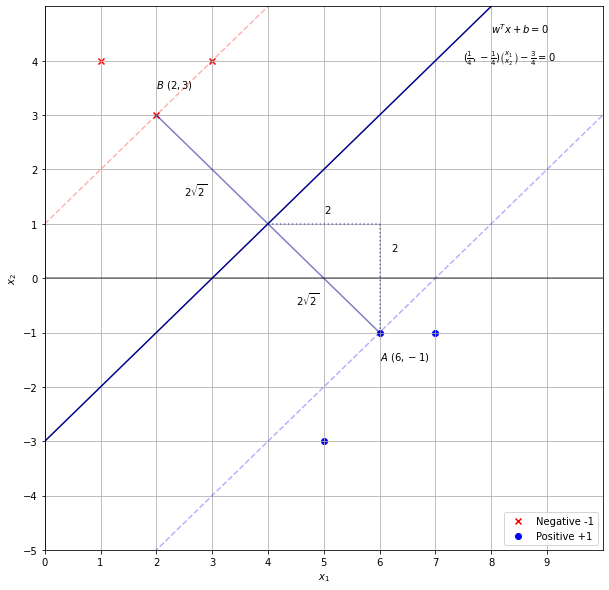

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Data set
x_neg = np.array([[3,4],[1,4],[2,3]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[6,-1],[7,-1],[5,-3]])
y_pos = np.array([1,1,1])
x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))

#Data for the next section
X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos,y_neg))

#Parameters guessed by inspection
w = np.array([1,-1]).reshape(-1,1)
b = -3

#Plot
fig = plt.figure(figsize = (10,10))
plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
plt.plot(x1, x1  - 3, color = 'darkblue')
plt.plot(x1, x1  - 7, linestyle = '--', alpha = .3, color = 'b')
plt.plot(x1, x1  + 1, linestyle = '--', alpha = .3, color = 'r')
plt.xlim(0,10)
plt.ylim(-5,5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)
plt.plot([2,6],[3,-1], linestyle = '-', color = 'darkblue', alpha = .5 )
plt.plot([4,6],[1,1],[6,6],[1,-1], linestyle = ':', color = 'darkblue', alpha = .5 )

#Annotations
plt.annotate(s = '$A \ (6,-1)$', xy = (5,-1), xytext = (6,-1.5))
plt.annotate(s = '$B \ (2,3)$', xy = (2,3), xytext = (2,3.5))#, arrowprops = {'width':.2, 'headwidth':8})
plt.annotate(s = '$2$', xy = (5,1.2), xytext = (5,1.2) )
plt.annotate(s = '$2$', xy = (6.2,.5), xytext = (6.2,.5))
plt.annotate(s = '$2\sqrt{2}$', xy = (4.5,-.5), xytext = (4.5,-.5))
plt.annotate(s = '$2\sqrt{2}$', xy = (2.5,1.5), xytext = (2.5,1.5))
plt.annotate(s = '$w^Tx + b = 0$', xy = (8,4.5), xytext = (8,4.5))
plt.annotate(s = '$(\\frac{1}{4},-\\frac{1}{4}) \\binom{x_1}{x_2}- \\frac{3}{4} = 0$', xy = (7.5,4), xytext = (7.5,4))

#Labels and show
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 'lower right')
plt.grid()

### Implementing the SVM algorithm (Hard Margin)

Since we will solve this optimization problem using the **CVXOPT** library in python, we will need to match the solver's API which, according to the documentation is of the form:

$$
\begin{aligned}
    & \min \frac{1}{2} x^TPx + q^Tx
    \\
     s.t. \ & \ Gx \leq h 
    \\
    & \ Ax = b
\end{aligned}
$$

Recall that the dual problem is expressed as:

$$
\max_{\alpha} \sum_i^m \alpha_i - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha_i \alpha_j <x^{(i)} x^{(j)}>
$$

Let $\mathbf{H}$ be a matrix such that 

$$H_{ij} = y^{(i)}y^{(j)} <x^{(i)} x^{(j)}> $$

Then the optimization becomes:

$$
\begin{aligned}
    & \max_{\alpha} \sum_i^m \alpha_i  - \frac{1}{2}  \alpha^T \mathbf{H}  \alpha
    \\
     s.t. & \ \alpha_i \geq 0 
    \\
    &  \ \sum_i^m \alpha_i y^{(i)} = 0  
\end{aligned}
$$

We convert the sums into vector form and multiply both the objective and the constraint by −1
which turns this into a minimization problem and reverses the inequality

$$
\begin{aligned}
    & \min_{\alpha}  \frac{1}{2}  \alpha^T \mathbf{H}  \alpha - 1^T \alpha
    \\
    & s.t. \ - \alpha_i \leq 0 
    \\
    & s.t. \ y^T \alpha = 0 
\end{aligned}
$$

We have that strange <code>1.T</code> just for the sake of matching with <code>CVXOPT</code> solver API.

We are now ready to convert our numpy arrays into the cvxopt format, using the same notations as in the documentation.  

- $\mathbf{P} = \mathbf{H}$ a matrix of size $(m, m)$
- $\mathbf{q} = \mathbf{-1}$ a matrix of size $(m, 1)$
- $\mathbf{G} = \mathbf{-diag[1]}$ a diagonal matrix of $-1s$ size $(m, m)$
- $\mathbf{h} = \mathbf{0}$ a vector of size $(m,1)$
- $\mathbf{A} = \mathbf{y}$ a vector of size $(m,1)$
- $\mathbf{b} = \mathbf{0}$ a scalar$


Note that in the simple example of $m=2$ the matrix $\mathbf{G}$ and vector $\mathbf{h}$ which define the constraint are

$$
G = \begin{bmatrix} -1 & 0 \\ 0 & -1 \end{bmatrix}
$$

$$
h = \begin{bmatrix} 0 \\ 0  \end{bmatrix}
$$


### Computing the matrix H in vectorized form

Consider the simple example with 2 input samples $\{x^{(1)}, x^{(2)}\} \in \mathbb{R}^2$ which are two dimensional vectors

$$
X = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \end{bmatrix} \ \ \ y = \begin{bmatrix} y^{(1)}  \\ y^{(2)} \end{bmatrix}
$$

We now proceed to create a new matrix $X'$ where each input sample x is multiplied by the corresponding output label y. This can be done easily in Numpy using vectorization and padding.

$$
X' = \begin{bmatrix} x^{(1)}_1 y^{(1)} & x^{(1)}_2y^{(1)} \\
x^{(2)}_1y^{(2)} & x^{(2)}_2y^{(2)} \end{bmatrix}
$$

Finally we take the **matrix multiplication** of $X'$ and its transpose giving $H = X'X'.T$

$$
H = X' @ X'^T = \begin{bmatrix} x^{(1)}_1 y^{(1)} & x^{(1)}_2y^{(1)} \\
x^{(2)}_1y^{(2)} & x^{(2)}_2y^{(2)} \end{bmatrix} \begin{bmatrix} x^{(1)}_1 y^{(1)} & x^{(2)}_1 y^{(2)}  \\
x^{(1)}_2y^{(1)} & x^{(2)}_2y^{(2)} \end{bmatrix}
$$

$$

$$


#### Implementation Using CVXOPT

In [2]:
#Importing with custom names to avoid issues with numpy / sympy matrix
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#### Compute w and b parameters

In [3]:
#w parameter in vectorized form
w = ((y * alphas).T @ X).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

Alphas =  [0.0625     0.06249356]
w =  [ 0.24999356 -0.25000644]
b =  [-0.74996781]


### Implementing the SVM algorithm (Soft Margin)

To make the data no longer linearly separable, we shall add a positive point in the middle of the negative cluster:

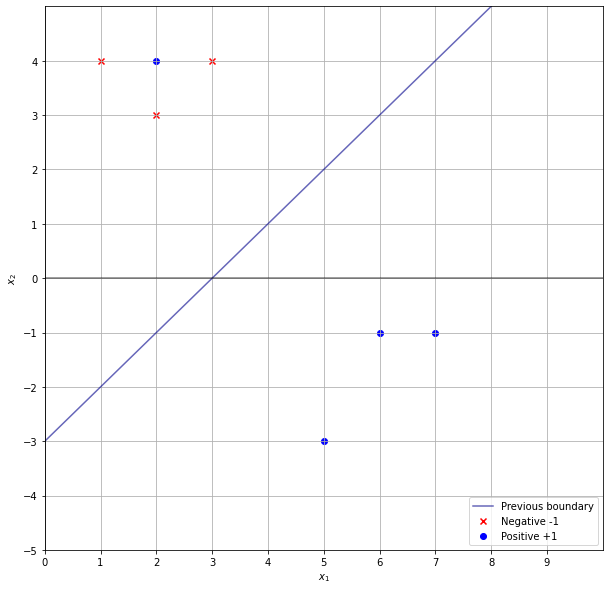

In [4]:
x_neg = np.array([[3,4],[1,4],[2,3]])
y_neg = np.array([-1,-1,-1])
x_pos = np.array([[6,-1],[7,-1],[5,-3],[2,4]])
y_pos = np.array([1,1,1,1])
x1 = np.linspace(-10,10)
x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))


fig = plt.figure(figsize = (10,10))
plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
plt.plot(x1, x1  - 3, color = 'darkblue', alpha = .6, label = 'Previous boundary')
plt.xlim(0,10)
plt.ylim(-5,5)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(-5, 5, step=1))

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.legend(loc = 'lower right')
plt.grid()

#New dataset (for later)
X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3],[2,4]] )
y = np.array([-1,-1, -1, 1, 1 , 1, 1 ])

For the softmax margin SVM, the optimization problem can be slightly revised and be expressed as 

$$
\begin{aligned}
    & \max_{\alpha} \sum_i^m \alpha_i  - \frac{1}{2}  \alpha^T \mathbf{H}  \alpha
    \\
     s.t. \ \ & 0 \leq \alpha_i \leq C 
    \\
    &  \ \sum_i^m \alpha_i y^{(i)} = 0  
\end{aligned}
$$

which can be written in standard form as

$$
\begin{aligned}
    & \min_{\alpha}  \frac{1}{2}  \alpha^T \mathbf{H}  \alpha - 1^T \alpha
    \\
     s.t. & \ - \alpha_i \leq 0 
    \\
     & \alpha_i \leq C
     \\
     &\ y^T \alpha = 0  
\end{aligned}
$$

We translate this new constraint into standard form by concatenating below matrix $\mathbf{G}$ a diagonal matrix of 1s of size $(m, m)$. Similarly for the vector $\mathbf{h}$ to which the value of $\mathbf{C}$ is added $m$ times.

Note that in the simple example of $m=2$ the matrix $\mathbf{G}$ and vector $h$ which define the constraint are:

$$
G = \begin{bmatrix} -1 & 0 \\ 0 & -1 \\ 1 & 0 \\ 0 & 1\end{bmatrix}
$$

$$
h = \begin{bmatrix} 0 \\ 0 \\ C \\ C \end{bmatrix}
$$



In [5]:
#Initializing values and computing H. Note the 1. to force to float type
C = 10
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

Alphas =  [ 5.      6.3125  1.3125 10.    ]
w =  [ 0.25 -0.25]
b =  [-0.75]


### Comparing to Sklearn results

In [6]:
from sklearn.svm import SVC

clf = SVC(C = 10, kernel = 'linear')
clf.fit(X, y.ravel()) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[ 0.25 -0.25]]
b =  [-0.75]
Indices of support vectors =  [0 2 3 6]
Support vectors =  [[ 3.  4.]
 [ 2.  3.]
 [ 6. -1.]
 [ 2.  4.]]
Number of support vectors for each class =  [2 2]
Coefficients of the support vector in the decision function =  [[ 5.      6.3125  1.3125 10.    ]]
